## Work Life Balance:
comparing work hours between countries.

In [27]:
library(tidyverse)
library(readxl)
library(glue)


In [28]:
library(xml2)
library(rvest)

In [29]:
work_hours <- read.csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.HRWKD.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en")

In [30]:
glimpse(work_hours)

Rows: 1,803
Columns: 8
$ LOCATION   <chr> "AUS", "AUS", "AUS", "AUS", "AUS", "AUS", "AUS", "AUS", "AU…
$ INDICATOR  <chr> "HRWKD", "HRWKD", "HRWKD", "HRWKD", "HRWKD", "HRWKD", "HRWK…
$ SUBJECT    <chr> "TOT", "TOT", "TOT", "TOT", "TOT", "TOT", "TOT", "TOT", "TO…
$ MEASURE    <chr> "HR_WKD", "HR_WKD", "HR_WKD", "HR_WKD", "HR_WKD", "HR_WKD",…
$ FREQUENCY  <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A",…
$ TIME       <int> 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,…
$ Value      <dbl> 1876.000, 1877.000, 1889.000, 1885.000, 1875.000, 1853.000,…
$ Flag.Codes <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…


In [31]:
work_hours

LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag.Codes
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<lgl>
AUS,HRWKD,TOT,HR_WKD,A,1985,1876.000,NA
AUS,HRWKD,TOT,HR_WKD,A,1986,1877.000,NA
AUS,HRWKD,TOT,HR_WKD,A,1987,1889.000,NA
AUS,HRWKD,TOT,HR_WKD,A,1988,1885.000,NA
AUS,HRWKD,TOT,HR_WKD,A,1989,1875.000,NA
AUS,HRWKD,TOT,HR_WKD,A,1990,1853.000,NA
AUS,HRWKD,TOT,HR_WKD,A,1991,1854.038,NA
AUS,HRWKD,TOT,HR_WKD,A,1992,1845.604,NA
AUS,HRWKD,TOT,HR_WKD,A,1993,1855.744,NA


In [32]:
work_hours <- (work_hours %>% select(LOCATION, TIME, Value))
work_hours

LOCATION,TIME,Value
<chr>,<int>,<dbl>
AUS,1985,1876.000
AUS,1986,1877.000
AUS,1987,1889.000
AUS,1988,1885.000
AUS,1989,1875.000
AUS,1990,1853.000
AUS,1991,1854.038
AUS,1992,1845.604
AUS,1993,1855.744


In [34]:
work_hours_filtered <- work_hours[work_hours$LOCATION %in% c('NZL', 'KOR', 'USA', 'NLD'),]
work_hours_filtered #filter by the wanted countries

,LOCATION,TIME,Value
,<chr>,<int>,<dbl>
689,KOR,2008,2228
690,KOR,2009,2174
691,KOR,2010,2163
692,KOR,2011,2136
693,KOR,2012,2119
694,KOR,2013,2106
695,KOR,2014,2076
696,KOR,2015,2083
697,KOR,2016,2068


checking if there is any country with NA values:

In [38]:
colSums(is.na(work_hours_filtered))

LOCATION     TIME    Value 
       0        0        0

Plotting the trend of work hours per OECD country selected:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



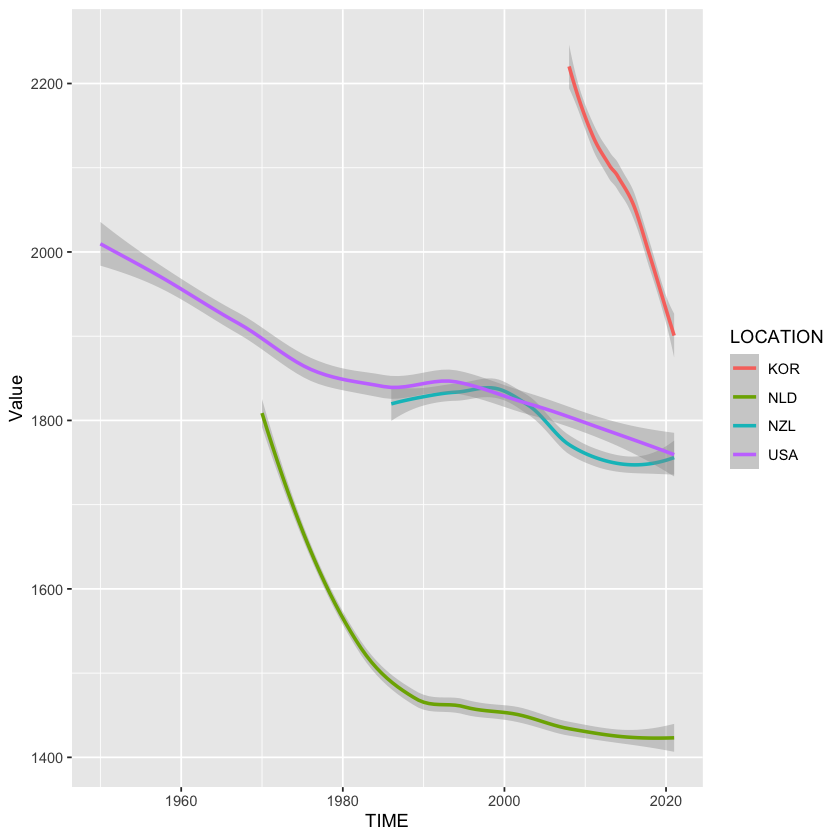

In [42]:
work_hours_filtered %>%
  ggplot(aes(x = TIME, y = Value, col=LOCATION)) + geom_smooth()

Illustrating the raw changes in work hours per year:

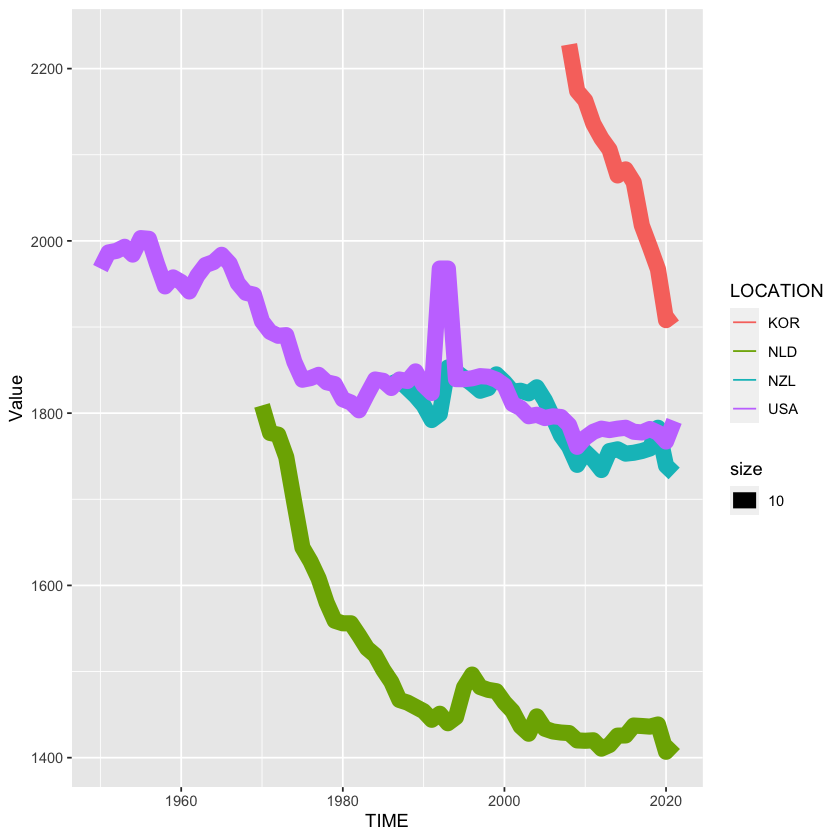

In [47]:
work_hours_filtered %>% 
    ggplot(aes(x = TIME, y = Value, col=LOCATION, size=10)) + 
    geom_freqpoly(stat='identity') 

Calculating the average of each oecd country's average working hours:

In [52]:
average_hours <- (work_hours_filtered %>% group_by(LOCATION) %>%
                  summarise(avg_hours = median(Value)))
average_hours

LOCATION,avg_hours
<chr>,<dbl>
KOR,2079.500
NLD,1456.538
NZL,1804.000
USA,1839.037


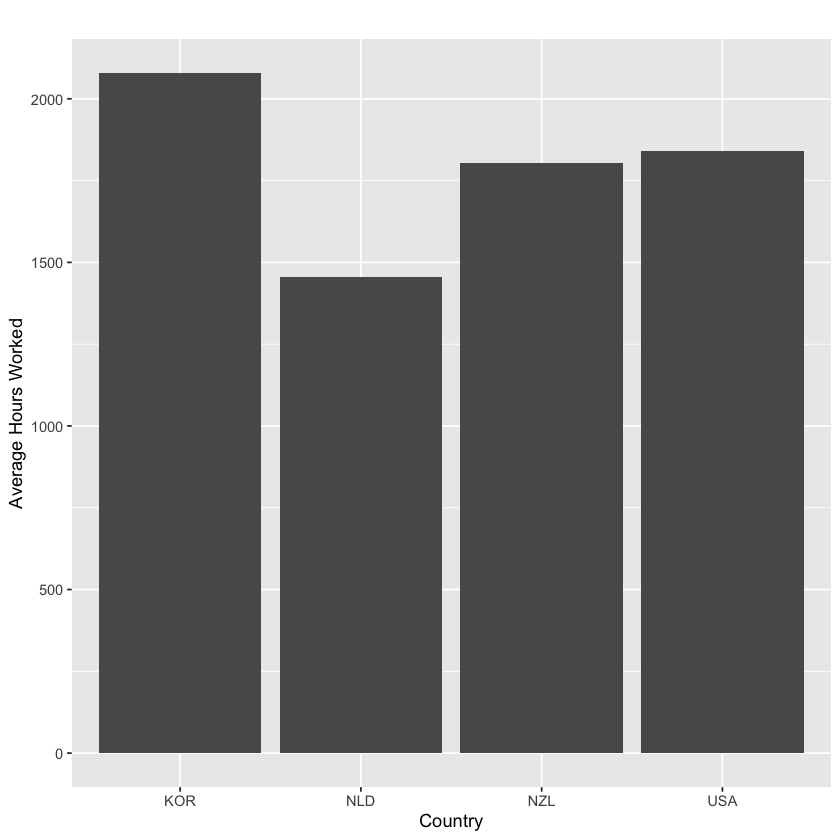

In [58]:
average_hours %>%
  ggplot(aes(x=LOCATION, y=avg_hours)) + geom_bar(stat='identity') +
labs(x='Country', y='Average Hours Worked', title = '')